In [1]:
# from mnist import MNIST
# import random
# import numpy as np

# mndata = MNIST('./')

# images1, labels1 = mndata.load_training()
# images2, labels2 = mndata.load_testing()

# index = 7  # choose an index ;-)
# print(mndata.display(images1[index]))
# print(labels1[index])
# print(mndata.display(images2[index]))

In [3]:
# input_layer = np.array([
#   [1.2, 5.1, 2.3],
#   [2.2, 2.1, 6.2],
#   [1.1, 3.1, 4.1],
# ])

# weights = np.array([
#   [0.15, 0.10, 0.75],
#   [0.24, 0.05, 0.23],
#   [0.98, 0.21, 0.11],
#   [0.15, 0.52, 0.22],
#   [0.16, 0.65, 0.07],
# ])
# bias = 0.01

# layer1 = np.dot(input_layer, weights.T) + bias
# print(layer1, '\n')
# # layer2 = np.dot(weights.T, layer1) + bias
# # print(layer2)

[[2.425 1.082 2.51  3.348 3.678]
 [5.2   2.069 3.289 2.796 2.161]
 [3.56  1.372 2.19  2.689 2.488]] 



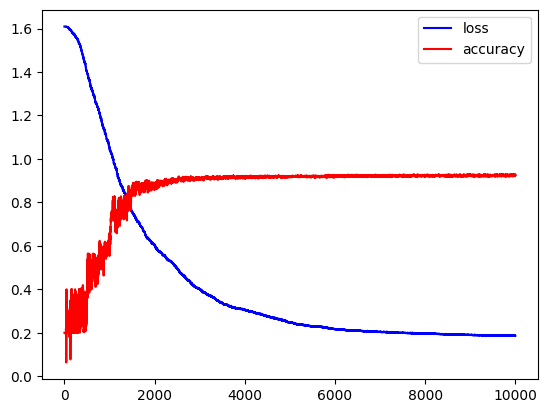

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data, vertical_data

nnfs.init()

class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))
  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases
  
class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

class Activation_Sigm:
  def forward(self, inputs):
    self.output = 1 / (1 + np.exp(-inputs))

class Activation_Softmax:
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
    probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims = True)
    self.output = probabilities

class Loss:
  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = np.mean(sample_losses)
    return data_loss

class Loss_CategoricalCrossentropy(Loss):
  def forward(self, y_pred, y_true):
    samples = len(y_pred)
    y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[range(samples), y_true]
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods

n_classes = 5
layer_neurons = 10

X, y = vertical_data(samples = 300, classes = n_classes)
dense1 = Layer_Dense(n_inputs = 2, n_neurons = layer_neurons)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(n_inputs = layer_neurons, n_neurons = n_classes)
activation2 = Activation_Softmax()
loss_function = Loss_CategoricalCrossentropy()

steps = []
losses = []
accuracies = []

lowest_loss = 10

for i in range(10000):
  dense1.weights += 0.01 * np.random.randn(2, layer_neurons)
  dense1.biases += 0.01 * np.random.randn(1, layer_neurons)
  
  dense2.weights += 0.01 * np.random.randn(layer_neurons, n_classes)
  dense2.biases += 0.01 * np.random.randn(1, n_classes)

  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)

  loss = loss_function.calculate(activation2.output, y)

  predictions = np.argmax(activation2.output, axis = 1)
  accuracy = np.mean(predictions == y)

  steps.append(i)
  losses.append(loss)
  accuracies.append(accuracy)

  if loss < lowest_loss:
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    lowest_loss = loss
  else:
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()

plt.plot(steps, losses, color = 'b')
plt.plot(steps, accuracies, color = 'r')
plt.legend(["loss", "accuracy"])
plt.show()

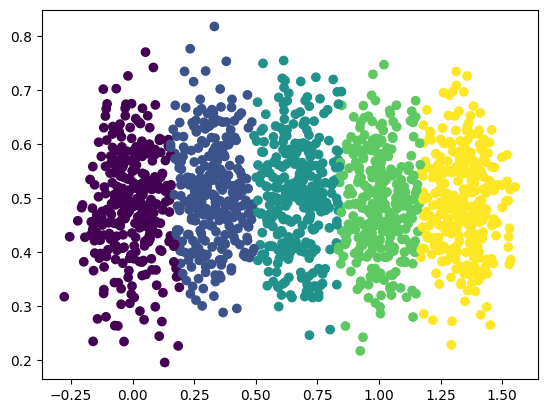

In [2]:
plt.scatter(X[:,0], X[:,1], c = predictions)
plt.show()

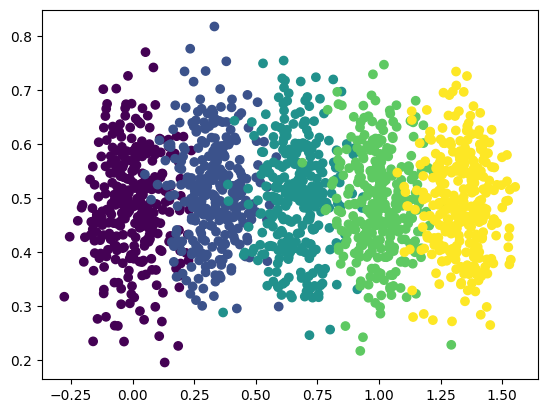

In [3]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()